In [134]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

# Gather

In [135]:
# Read in csv file as a Pandas DataFrame
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [136]:
# Getting the tsv file from the gien link provided using request library
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
#reading the file
img_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [137]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [138]:
'''with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue
'''

"with open('tweet_json.txt', 'a', encoding='utf8') as f:\n    for tweet_id in twitter_archive['tweet_id']:\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode='extended')\n            json.dump(tweet._json, f)\n            f.write('\n')\n        except:\n            continue\n"

In [139]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [140]:
tweet_info = pd.DataFrame()
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

# Assess

In [141]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [142]:
twitter_archive.tail()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [143]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [144]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [145]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [146]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [147]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [148]:
img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [149]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [150]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [151]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8353,38177
1,892177421306343426,6171,32740
2,891815181378084864,4084,24648
3,891689557279858688,8499,41507
4,891327558926688256,9190,39680


In [152]:
tweet_info.tail()

,id,retweet_count,favorite_count
2332,666049248165822465,41,108
2333,666044226329800704,139,296
2334,666033412701032449,43,124
2335,666029285002620928,47,128
2336,666020888022790149,507,2539


In [153]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [154]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.421864e+17,2948.644844,7997.267437
std,6.839302e+16,4959.135514,12380.410895
min,6.660209e+17,0.000000,0.000000
25%,6.783345e+17,591.000000,1377.000000
50%,7.184600e+17,1374.000000,3466.000000
75%,7.987020e+17,3440.000000,9803.000000
max,8.924206e+17,83953.000000,164766.000000


**Quality**

1. Several columns have empty values, like in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

2. The name column has many entries which do not look like names. The most frequent entry in name column is "a", which is not a name.

3. The numerator and denominator columns have unusual values.

4. The timestamp column is an object. It has to be a datetime object.

5. There are 2075 rows in the images dataframe and 2356 rows in the archive dataframe.

6. In several columns, null values are not treated as null values.

7. Incorrect Dog Names

8. Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)

9. Dataset contains retweets

10. Unnamed : 0 column should not exist

**Tidyness**

1. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

2. The columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.

3. Join 'tweet_info' and 'img_predictions' to 'twitter_archive'

# Clean

In [155]:
# Create copies of original DataFrames
twitter_archive_clean = twitter_archive.copy()
img_predictions_clean = img_predictions.copy()
tweet_info_clean = tweet_info.copy()

**Define**

Delete retweets and observations without ID, delete columns: 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

In [156]:
twitter_archive_clean=twitter_archive_clean[twitter_archive.tweet_id.notnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive.retweeted_status_id.isnull()]
twitter_archive_clean=twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [157]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


**Define**

Delete observations without image and merge img_predictions_clean with twitter_archive_clean

In [158]:
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].apply(str)

In [159]:
twitter_archive_clean.dtypes

tweet_id                 object 
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                object 
source                   object 
text                     object 
expanded_urls            object 
rating_numerator         int64  
rating_denominator       int64  
name                     object 
doggo                    object 
floofer                  object 
pupper                   object 
puppo                    object 
dtype: object

In [160]:
img_predictions_clean.tweet_id=img_predictions_clean.tweet_id.astype(str)
twitter_archive_clean = twitter_archive_clean.merge(img_predictions_clean, on='tweet_id', how='inner')

In [161]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       

**Define**

Create dog stage variable and remove individual dog stage columns.

In [162]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [163]:
# drop columns that are no longer needed from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

In [164]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                  1

**Define:**

Condensing dog breed predictions

In [165]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

twitter_archive_clean.apply(breed_conf, axis = 1)

twitter_archive_clean['breed'] = breed
twitter_archive_clean['confidence'] = conf

In [166]:
#removing the processed columns
twitter_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [167]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_stage,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712


**Define**

Add tweet_info to twitter_archive table.

In [168]:
tweet_info_clean['id']=tweet_info_clean['id'].apply(str)

In [169]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id                2337 non-null object
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [170]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='id', how='inner')

In [171]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'dog_stage',
       'breed', 'confidence', 'id', 'retweet_count', 'favorite_count'],
      dtype='object')

In [172]:
#twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].apply(int)

In [173]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 18 columns):
tweet_id                 1988 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1988 non-null object
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
dog_stage                326 non-null object
breed                    1988 non-null object
confidence               1988 non-null float64
id                       1988 non-null object
retweet_count            1988 non-null int64
favorite_count           1988 non-null int64
dtypes: float64(3), int64(5), object(10)
memory usage: 295.1+ KB


**Define**

Convert timestamp to datetime data type.

In [174]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

**Define**

convert in_reply_to_status_id,in_reply_to_user_id to string data type. Query data from API

In [175]:
rep_id=twitter_archive_clean.tweet_id[twitter_archive_clean.in_reply_to_user_id.notnull()]
twitter_archive_clean.in_reply_to_user_id=twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.in_reply_to_status_id=twitter_archive_clean.in_reply_to_status_id.astype(str)
for each_id in rep_id:
    tweet_info=api.get_status(each_id,tweet_mode='extended')
    twitter_archive_clean.loc[twitter_archive_clean.tweet_id==each_id, 'in_reply_to_user_id']=str(tweet_info.in_reply_to_user_id)
    twitter_archive_clean.loc[twitter_archive_clean.tweet_id==each_id, 'in_reply_to_status_id']=str(tweet_info.in_reply_to_status_id)

twitter_archive_clean.in_reply_to_user_id=twitter_archive_clean.in_reply_to_user_id.replace('nan',np.nan)
twitter_archive_clean.in_reply_to_status_id=twitter_archive_clean.in_reply_to_status_id.replace('nan',np.nan)

In [176]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 18 columns):
tweet_id                 1988 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1988 non-null datetime64[ns]
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
dog_stage                326 non-null object
breed                    1988 non-null object
confidence               1988 non-null float64
id                       1988 non-null object
retweet_count            1988 non-null int64
favorite_count           1988 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(11)
memory

**Define**

Set the value wrong names to 'None' and replace 'None' with np.nan.

In [177]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(),'name']='None'
twitter_archive_clean.name=twitter_archive_clean.name.replace('None',np.nan)

**Define**

Change the rating_numerator and rating_denominator for oberservations with wrong value

Oberservations with tweet_id '810984652412424192'doesn't have a valid rating, so drop this row.

Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.

Drop oberservations with extreme ratings.

In [178]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
794,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
842,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
885,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
919,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
940,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
964,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
982,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1048,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [179]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 18 columns):
tweet_id                 1988 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1988 non-null datetime64[ns]
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1345 non-null object
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
dog_stage                326 non-null object
breed                    1988 non-null object
confidence               1988 non-null float64
id                       1988 non-null object
retweet_count            1988 non-null int64
favorite_count           1988 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(11)
memory

In [180]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

twitter_archive_clean.loc[twitter_archive_clean.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9,10]

twitter_archive_clean['rating']=twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator
twitter_archive_clean=twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

twitter_archive_clean.loc[twitter_archive_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,3.428571
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.500000
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.700000
720,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.600000
1368,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.600000
1712,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.000000


In [181]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==786709082849828864,'rating']=1.0
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==778027034220126208,'rating']=1.1
twitter_archive_clean.loc[twitter_archive_clean.tweet_id==680494726643068929,'rating']=1.1
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.rating<2]

In [182]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1987
Data columns (total 17 columns):
tweet_id                 1982 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1982 non-null datetime64[ns]
source                   1982 non-null object
text                     1982 non-null object
expanded_urls            1982 non-null object
name                     1341 non-null object
jpg_url                  1982 non-null object
img_num                  1982 non-null int64
dog_stage                325 non-null object
breed                    1982 non-null object
confidence               1982 non-null float64
id                       1982 non-null object
retweet_count            1982 non-null int64
favorite_count           1982 non-null int64
rating                   1982 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(11)
memory usage: 278.7+ KB


In [183]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

**Define**

Remove Unnamed: 0 column

In [192]:
df=pd.read_csv('twitter_archive_master.csv')
df

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,dog_stage,breed,confidence,id,retweet_count,favorite_count,rating
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,Unidentifiable,0.000000,892420643555336193,8353,38177,1.3
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581,892177421306343426,6171,32740,1.3
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012,891815181378084864,4084,24648,1.2
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086,891689557279858688,8499,41507,1.3
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712,891327558926688256,9190,39680,1.2
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,Chesapeake_Bay_retriever,0.425595,891087950875897856,3059,19925,1.3
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,NaN,Appenzeller,0.341703,890971913173991426,2028,11644,1.3
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,https://pb

In [193]:
df.drop(['Unnamed: 0'], axis=1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,dog_stage,breed,confidence,id,retweet_count,favorite_count,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,Unidentifiable,0.000000,892420643555336193,8353,38177,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581,892177421306343426,6171,32740,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012,891815181378084864,4084,24648,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086,891689557279858688,8499,41507,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712,891327558926688256,9190,39680,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,Chesapeake_Bay_retriever,0.425595,891087950875897856,3059,19925,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,NaN,Appenzeller,0.341703,890971913173991426,2028,11644,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,https://pbs.twimg.com/media/DFyBahAVw

In [195]:
df.to_csv('twitter_archive_master.csv')

# Analyze and Visualize Data

In [184]:
df=pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 18 columns):
Unnamed: 0               1982 non-null int64
tweet_id                 1982 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1982 non-null object
source                   1982 non-null object
text                     1982 non-null object
expanded_urls            1982 non-null object
name                     1341 non-null object
jpg_url                  1982 non-null object
img_num                  1982 non-null int64
dog_stage                325 non-null object
breed                    1982 non-null object
confidence               1982 non-null float64
id                       1982 non-null int64
retweet_count            1982 non-null int64
favorite_count           1982 non-null int64
rating                   1982 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 278.8+ KB


**Most Rated Breeds**

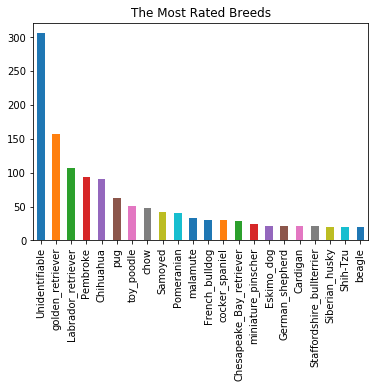

In [185]:
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

It's difficult to know which of  these breeds are the top breeds. Because majority of them are unidentified we need to improve the model which is predicting them.

In [186]:
top.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Cardigan,21.0,1.114286,0.159015,0.7,1.000,1.10,1.2,1.3
Chesapeake_Bay_retriever,29.0,1.082759,0.146553,0.8,1.000,1.00,1.2,1.3
Chihuahua,91.0,1.050949,0.209656,0.3,1.000,1.10,1.2,1.4
Eskimo_dog,22.0,1.140909,0.140269,0.9,1.000,1.20,1.2,1.4
French_bulldog,30.0,1.116667,0.182101,0.8,1.000,1.15,1.2,1.4
German_shepherd,21.0,1.100000,0.144914,0.8,1.000,1.10,1.2,1.3
Labrador_retriever,107.0,1.119626,0.132066,0.7,1.000,1.10,1.2,1.4
Pembroke,93.0,1.141935,0.173407,0.4,1.100,1.20,1.2,1.4
Pomeranian,41.0,1.095122,0.139555,0.6,1.000,1.10,1.2,1.4


In [187]:
df['rating'].describe()

count    1982.000000
mean     1.053963   
std      0.219475   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

In [188]:
df.rating.value_counts()

1.200000    452
1.000000    420
1.100000    399
1.300000    261
0.900000    151
0.800000    95 
0.700000    51 
1.400000    35 
0.500000    34 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    4  
0.000000    2  
0.636364    1  
0.818182    1  
Name: rating, dtype: int64

* Here we have a statistical comparison of the top breeds with all the ratings. Only the top breeds have a mean higher than the total population mean.

* Here mean rating is around 1.053963. The 3 most common ratings are 1.2,1.0,1.1

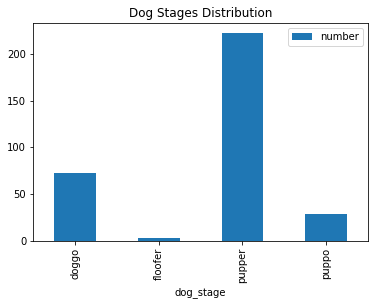

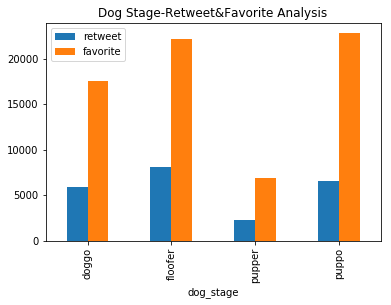

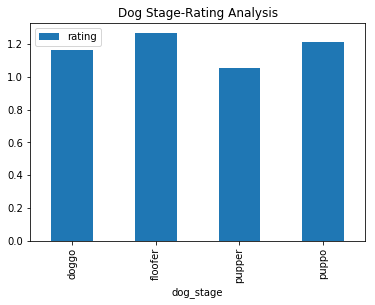

In [189]:
stage_analyze=pd.DataFrame(columns=['dog_stage','number','rating','retweet','favorite'])
stage_analyze['dog_stage']=['doggo','floofer','pupper','puppo']
for each_stage in stage_analyze.dog_stage:
    stage_df=df[df.dog_stage==each_stage]
    stage_analyze.loc[stage_analyze.dog_stage== each_stage,'number']=stage_df.shape[0]
    stage_analyze.loc[stage_analyze.dog_stage== each_stage,'rating']=stage_df['rating'].mean()
    stage_analyze.loc[stage_analyze.dog_stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage_analyze.loc[stage_analyze.dog_stage== each_stage,'favorite']=stage_df['favorite_count'].mean()
    
    
stage_analyze[['dog_stage','number']].plot(x='dog_stage',kind='bar',title='Dog Stages Distribution')

stage_analyze[['dog_stage','retweet','favorite']].plot(x='dog_stage',kind='bar',title='Dog Stage-Retweet&Favorite Analysis')

stage_analyze[['dog_stage','rating']].plot(x='dog_stage',kind='bar',title='Dog Stage-Rating Analysis')

* Among the 4 dog stages, pupper has the biggest frequency, but pupper also gets the lowest favorite counts and retweet counts and rating.